In [19]:
import sys
sys.path.append('..')
from common.util import preprocess, create_co_matrix, cos_similarity
import numpy as np
import matplotlib.pyplot as plt

In [20]:
text = 'You say goodbye and I say hello.'

In [21]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    if query not in word_to_id:
        print('%s is not found.' % query)
        return

    print('\n[query]' + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]

    vocab_size = len(id_to_word)
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)

    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue
        print('%s: %s' % (id_to_word[i], similarity[i]))

        count += 1
        if count >= top:
            return

In [22]:
corpus, word_to_id, id_to_word = preprocess(text)

In [23]:
vocab_size = len(word_to_id)

In [24]:
C = create_co_matrix(corpus, vocab_size)

In [25]:
most_similar('you', word_to_id, id_to_word, C, top=5)


[query]you
goodbye: 0.7071067691154799
i: 0.7071067691154799
hello: 0.7071067691154799
say: 0.0
and: 0.0


In [26]:
def ppmi(C, verbose=False, eps=1e-8):
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C, axis=0)

    total = C.shape[0] * C.shape[1]
    cnt = 0

    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[j] * S[i]) + eps)
            M[i, j] = max(0, pmi)

            if verbose:
                cnt += 1
                if cnt % (total//100) == 0:
                    print('%.1f%% done' % (100*cnt/total))
    return M

In [27]:
W = ppmi(C)

In [28]:
np.set_printoptions(precision=3)
print('covariance matrix')
print(C)
print('-'*50)
print('PPMI')
print(W)

covariance matrix
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


In [29]:
U, S, V = np.linalg.svd(W)

In [30]:
print(C[0])
print(W[0])
print(U[0])
print(S)
print(V)

[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[ 3.409e-01  0.000e+00  1.205e-01 -3.608e-16 -1.110e-16  9.323e-01
  1.626e-16]
[3.168e+00 3.168e+00 2.703e+00 2.703e+00 1.514e+00 1.514e+00 1.420e-16]
[[ 0.000e+00  5.976e-01  1.618e-17  4.978e-01  3.492e-16 -2.059e-16
   6.285e-01]
 [-3.409e-01 -1.110e-16 -4.363e-01  0.000e+00 -4.363e-01 -7.092e-01
  -0.000e+00]
 [ 0.000e+00  1.802e-01  2.957e-17  6.804e-01  7.120e-17 -6.758e-17
  -7.103e-01]
 [ 1.205e-01 -5.551e-16  5.088e-01  0.000e+00  5.088e-01 -6.839e-01
  -0.000e+00]
 [-9.323e-01  0.000e+00  2.253e-01  0.000e+00  2.253e-01  1.710e-01
  -0.000e+00]
 [-0.000e+00  7.812e-01  2.577e-16 -5.378e-01  2.022e-16 -3.529e-16
  -3.169e-01]
 [ 0.000e+00  9.260e-17 -7.071e-01  1.388e-17  7.071e-01  4.903e-18
   4.873e-17]]


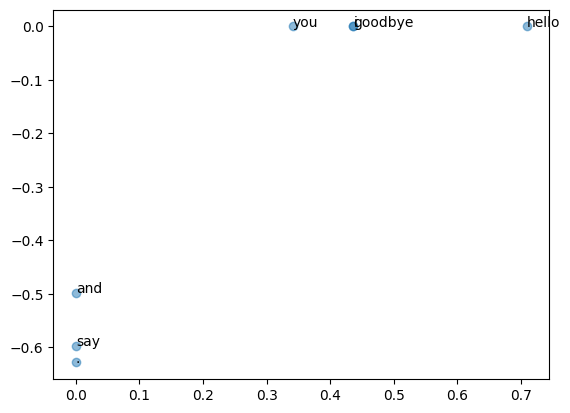

In [32]:
for word, word_id in word_to_id.items():
  plt.annotate(word, (U[word_id, 0], U[word_id, 1]))

plt.scatter(U[:, 0], U[:, 1], alpha=0.5)
plt.show()